In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
milk = pd.read_csv('monthly-milk-production.csv',';', index_col=['month'], parse_dates=['month'], dayfirst=True)

In [4]:
milk.sample(3)

,milk
month,
1966-06-01,798
1968-09-01,701
1972-04-01,900


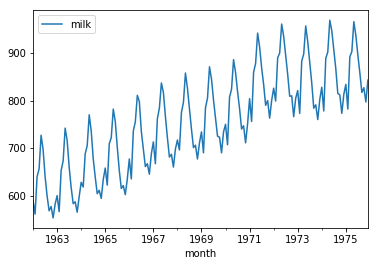

In [5]:
milk.plot()

Примените к ряду из предыдущего вопроса критерий Дики-Фуллера.
Чему равен полученный достигаемый уровень значимости? Округлите до двух знаков после десятичной точки.

In [7]:

import statsmodels.api as sm
sm.tsa.stattools.adfuller(milk.milk)

(-1.3038115874221272,
 0.6274267086030327,
 13,
 154,
 {'1%': -3.473542528196209,
  '10%': -2.576878053634677,
  '5%': -2.880497674144038},
 1115.1730447395112)

Часто, когда вы имеете дело с величинами, представляющими собой сумму значений показателя за каждый день или за каждый рабочий день, имеет смысл перед началом прогнозирования поделить весь ряд на число дней в периоде. Например, если поделить ряд с объёмом производства молока на одну корову на число дней в месяце, полученная величина будет меняться более плавно, и для неё легче будет построить прогнозирующую модель.

Корректно определить число дней в месяце можно с помощью свойства days_in_month у индекса ряда или функции monthrange из пакета calendar. Используйте число дней в месяце для того, чтобы вычислить новый показатель — среднее дневное число полученного молока на одну корову. Постройте график этого ряда и убедитесь, что он стал более гладким.

В качестве ответа введите сумму значений полученного показателя за весь период; округлите до двух знаков после десятичной точки.

In [5]:
milk.index[0].days_in_month
milk['days_in_month'] = milk.index.days_in_month
milk.head(3)

,milk,days_in_month
month,,
1962-01-01,589,31
1962-02-01,561,28
1962-03-01,640,31


In [6]:
milk['milk_per_day'] = milk.milk / milk.days_in_month
milk.head(3)

,milk,days_in_month,milk_per_day
month,,,
1962-01-01,589,31,19.000000
1962-02-01,561,28,20.035714
1962-03-01,640,31,20.645161


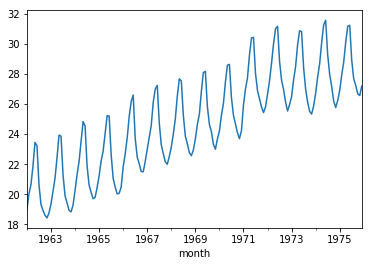

In [7]:
milk['milk_per_day'].plot()

In [8]:
round(sum(milk['milk_per_day']), 2)

4166.33

In [9]:
#ma = milk.rolling('milk_per_day').mean()
#ma.plot(color='black', linewidth=1.5, marker='', figsize=(8, 4), label='MA')
df = pd.DataFrame({'B': [8, 1, 2, 3, 4], 'A': [3, 4, 5, 6, 7]})

In [10]:
df.rolling(3, center=True, axis=0).std()

,A,B
0,NaN,NaN
1,1.0,3.785939
2,1.0,1.000000
3,1.0,1.000000
4,NaN,NaN


Загрузите ряд, создайте новый ряд значений среднего дневного уровня производства молока в фунтах на одну корову, поделив на число дней в месяце (вычисляется с помощью функции monthrange из пакета calendar). Постройте график полученного ряда; какой из приведённых ниже графиков у вас получился?

Для ряда со средним дневным количеством молока на корову из предыдущего вопроса давайте с помощью критерия Дики-Фуллера подберём порядок дифференцирования, при котором ряд становится стационарным.

In [13]:
milk['daily_diff1'] = milk.milk_per_day - milk.milk_per_day.shift(1)
milk.head(3)

,milk,days_in_month,milk_per_day,daily_diff1
month,,,,
1962-01-01,589,31,19.000000,NaN
1962-02-01,561,28,20.035714,1.035714
1962-03-01,640,31,20.645161,0.609447


Чтобы сделать сезонное дифференцирование, нужно изменить значение параметра у функции shift

In [15]:
milk['daily_diff12'] = milk.milk_per_day - milk.milk_per_day.shift(12)
milk.head(3)

,milk,days_in_month,milk_per_day,daily_diff1,daily_diff12
month,,,,,
1962-01-01,589,31,19.000000,NaN,NaN
1962-02-01,561,28,20.035714,1.035714,NaN
1962-03-01,640,31,20.645161,0.609447,NaN


In [32]:
m_1 = milk.loc[milk.daily_diff1.notnull() == True]['daily_diff1']
m_12 = milk.loc[milk.daily_diff12.notnull() == True]['daily_diff12']

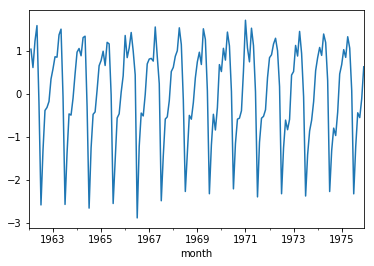

In [35]:
milk.daily_diff1.plot()

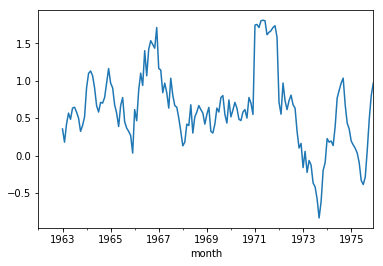

In [36]:
milk.daily_diff12.plot()

In [33]:
import statsmodels.api as sm
sm.tsa.stattools.adfuller(m_1)

(-2.759469476228911,
 0.06430054654174693,
 11,
 155,
 {'1%': -3.4732590518613002,
  '10%': -2.5768120811654525,
  '5%': -2.880374082105334},
 -1.1539973381055688)

In [34]:
sm.tsa.stattools.adfuller(m_12)

(-2.1594860932888063,
 0.22127672658830438,
 12,
 143,
 {'1%': -3.4769274060112707,
  '10%': -2.577665408088415,
  '5%': -2.8819726324025625},
 -25.225679141303317)

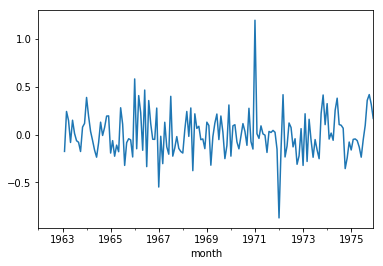

In [43]:
milk['daily_diff12_1'] = milk.daily_diff12 - milk.daily_diff12.shift(1)
milk.daily_diff12_1.plot()

In [44]:
m_12_1 = milk.loc[milk.daily_diff12_1.notnull() == True]['daily_diff12_1']
sm.tsa.stattools.adfuller(m_12_1)

(-5.481326334796926,
 2.2808455518037347e-06,
 11,
 143,
 {'1%': -3.4769274060112707,
  '10%': -2.577665408088415,
  '5%': -2.8819726324025625},
 -20.90513750989237)

Для стационарного ряда из предыдущего вопроса (продифференцированного столько раз, сколько вы посчитали нужным) постройте график автокорреляционной функции.

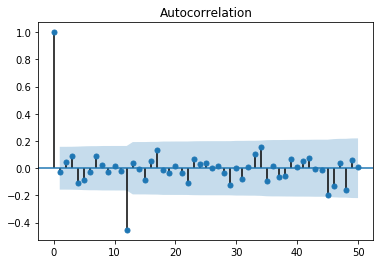

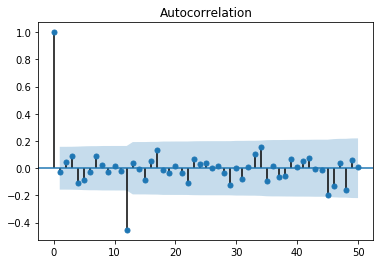

In [45]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(m_12_1.values.squeeze(), lags=50)

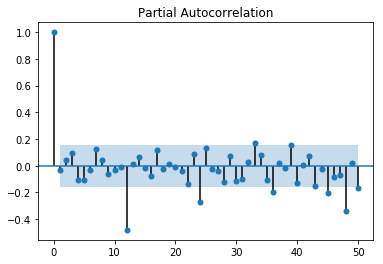

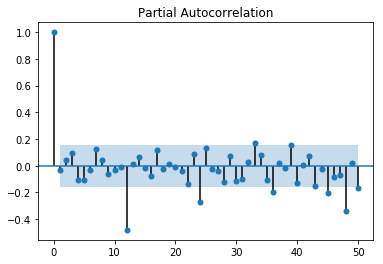

In [46]:
import statsmodels.api as sm
sm.graphics.tsa.plot_pacf(m_12_1.values.squeeze(), lags=50)